## Домашнее задание № 4

### Ансамблевые методы 

**Дедлайн: 3.06.2020 0:30** 
Сопровождайте код изображениями и комментариями. Не игнорируйте вопросы, ваши выводы тоже оцениваются. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше. Не забывайте подписывать графики и будет вам счастье!

**Максимальный балл: 10**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

**0. (0 баллов) ** Загрузите [датасет](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data), в нем вы найдете данные опрошенных женщин из индейского племени Пима. Будем решать задачу бинарной классификации: в колонке Outcome лежит метка наличия или отсутствия диабета - это наша целевая переменная. Есть ли пропущенные значения?

In [0]:
data = pd.read_csv('./diabetes.csv')

**1. (0.5 балла)** Как вы думаете, является ли наличие нулей в некоторых колонках фактом того, что эти признаки имеют пропущенные значения? Замените нули на среднее значение признака там, где считаете это целесообразным.

Да, нули в таких колонках как Glucose, BloodPressure, SkinThickness, BMI сигнализируют о пропущенных значениях, так как нулевое значение в этих колонках не имеет никакого смысла. 

In [0]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']
for column in columns:
    data[column] = data[column].replace(0, np.mean(data[column]))

**2. (1 балл)** Визуализируйте распределение признаков по отдельности для больных диабетом и здоровых. Ваши графики должны быть примерно такими:

![Image](https://d.radikal.ru/d03/2005/f8/0ffb9443cbcf.png)

**3. (2 балла)** Разбейте данные на обучающую и тестовую часть в соотношении 70:30. Обучите *BaggingClassifier* на деревьях (поставьте параметр *base_estimator = DecisionTreeClassifier()*) и *RandomForest*. Возьмите количество базовых алгоритмов, равное 10. Посчитайте accuracy, recall и precision. Есть ли какая-то разница между моделями и их результатами? Как вы думаете, почему получились такие результаты?

*tip: создайте отдельную функцию для вывода метрик качества;*

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [0]:
X, y = data.drop('Outcome', axis=1), data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

B_classif = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                              n_estimators=10)
B_classif.fit(X_train, y_train)

R_forest = RandomForestClassifier(n_estimators=10)
R_forest.fit(X_train, y_train)

def show_metrics():
    print('BaggingClassifier accuracy:', accuracy_score(B_classif.predict(X_test), y_test))
    print('BaggingClassifier precision:', precision_score(B_classif.predict(X_test), y_test))
    print('BaggingClassifier recall:', recall_score(B_classif.predict(X_test), y_test))
    print('RandomForestClassifier accuracy:', accuracy_score(R_forest.predict(X_test), y_test))
    print('RandomForestClassifier precision:', precision_score(R_forest.predict(X_test), y_test))
    print('RandomForestClassifier recall:', recall_score(R_forest.predict(X_test), y_test))

show_metrics()

BaggingClassifier accuracy: 0.7402597402597403
BaggingClassifier precision: 0.65
BaggingClassifier recall: 0.6190476190476191
RandomForestClassifier accuracy: 0.7445887445887446
RandomForestClassifier precision: 0.6
RandomForestClassifier recall: 0.64


Accuracy сравнима, точность больше у Bagging, а полнота у RandomForest. Оба алгоритма показывают примерно одиноковое качестов на всех трех метрика, так что сложжно судить о чем-либо.

**4. (2 балл)** Для случайного леса проанализируйте значение ROC-AUC на этих же данных в зависимости от изменения параметров:
* *n_estimators* (можно перебрать около 10 значений из отрезка от 10 до 1500)
* *min_samples_leaf* (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости ROC-AUC от этих параметров. Какие выводы можете сделать?

In [0]:
from sklearn.metrics import roc_auc_score

roc_auc_lst = []
f_matrix = []
n_estimators_lst = [10, 100, 300, 400, 600, 800, 1000, 1200, 1400, 1500]
min_samples_leaf_lst = [1, 3, 5, 7, 10, 15, 17, 22, 25, 31]
for n_estimators in n_estimators_lst:
    for min_samples_leaf in min_samples_leaf_lst:
        R_forest = RandomForestClassifier(n_estimators=n_estimators,
                                          min_samples_leaf=min_samples_leaf)
        R_forest.fit(X_train, y_train)
        y_proba = R_forest.predict(X_test)
        roc_auc_lst.append(roc_auc_score(y_test, y_proba))

    f_matrix.append(roc_auc_lst.copy())
    roc_auc_lst.clear()   


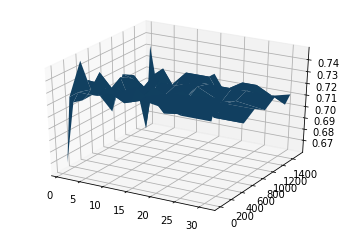

In [8]:
import matplotlib.pyplot as plt

T, X = np.meshgrid(n_estimators_lst, min_samples_leaf_lst)
f_matrix = np.array(f_matrix)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,T,f_matrix)
plt.show()

In [9]:
max_elem_coords = np.where(f_matrix == np.amax(f_matrix))
print('Best params!')
for x, y in zip(max_elem_coords[0], max_elem_coords[1]):
    print('n_estimators:', n_estimators_lst[x])
    print('min_samples_leaf:', min_samples_leaf_lst[x])

Best params!
n_estimators: 10
min_samples_leaf: 1


Лучшие результат рандомный лес показывает при кол-ве деревьев равное 100 и кол-ве объектов в листе равное 3. Я считаю данные параметры отлично подходят по причине того, что лес не переобучается как бы это было при кол-ве объектов в листе равное 1. В то же время нет проблемы недообучения, которая возникает при слишеом большое кол-ве объектов в листе.

**5. (1 балл)**. Посмотрите, оказались ли какие-то признаки более важными, чем остальные? Воспользуйтесь соответствующим аттрибутом случайного леса в библиотеке sklearn, чтобы построить barplot.

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

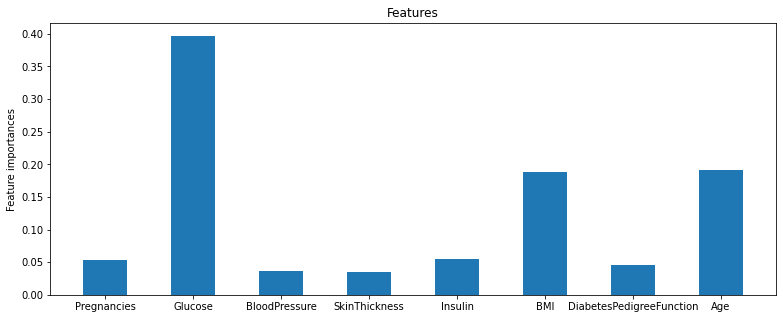

In [11]:
importances = R_forest.feature_importances_
x = range(len(importances))
y = importances
objects = ('Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age')

plt.subplots(figsize=(13,5))
plt.bar(x, y, align='center', width=0.5)
plt.xticks(x, objects)
plt.ylabel('Feature importances')
plt.title('Features')
plt.show()

На графике видно, что важными признаками являются уровень глюкозы (что вполне очевидно), BMI и Age.

**6. (2 балла)** Обучите HistGradientBoostingClassifier и GradientBoostingClassifier из sklearn. Опишите подробно, в чем заключается разница этих моделей. Подберите подходящее количество деревьев и проанализируйте метрики, с которыми мы работали выше.

In [12]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.23.1)


In [13]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier

print('GB Classifier')
for n_estimators in [3, 5, 7, 10, 13, 15, 17, 20, 30, 40]:
    gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators)
    gb_classifier.fit(X_train, y_train)
    print(f'-------------{n_estimators} estimators--------------')
    print('GB Classifier accuracy:', accuracy_score(gb_classifier.predict(X_test), y_test))
    print('GB Classifier precision:', precision_score(gb_classifier.predict(X_test), y_test))
    print('GB Classifier recall:', recall_score(gb_classifier.predict(X_test), y_test))

print()

print('Hist Classifier')
for n_estimators in [3, 5, 7, 10, 13, 15, 17, 20, 30, 40]:
    hist_classifier = HistGradientBoostingClassifier(max_iter=n_estimators)
    hist_classifier.fit(X_train, y_train)
    print(f'-------------{n_estimators} estimators--------------')
    print('Hist Classifier accuracy:', accuracy_score(hist_classifier.predict(X_test), y_test))
    print('Hist Classifier precision:', precision_score(hist_classifier.predict(X_test), y_test))
    print('Hist Classifier recall:', recall_score(hist_classifier.predict(X_test), y_test))

GB Classifier
-------------3 estimators--------------
GB Classifier accuracy: 0.7186147186147186
GB Classifier precision: 0.275
GB Classifier recall: 0.7586206896551724
-------------5 estimators--------------
GB Classifier accuracy: 0.7142857142857143
GB Classifier precision: 0.3125
GB Classifier recall: 0.6944444444444444
-------------7 estimators--------------
GB Classifier accuracy: 0.7142857142857143
GB Classifier precision: 0.3375
GB Classifier recall: 0.675
-------------10 estimators--------------
GB Classifier accuracy: 0.7532467532467533
GB Classifier precision: 0.525
GB Classifier recall: 0.6885245901639344
-------------13 estimators--------------
GB Classifier accuracy: 0.7532467532467533
GB Classifier precision: 0.5375
GB Classifier recall: 0.6825396825396826
-------------15 estimators--------------
GB Classifier accuracy: 0.7402597402597403
GB Classifier precision: 0.5625
GB Classifier recall: 0.6428571428571429
-------------17 estimators--------------
GB Classifier accurac

Лучшимими результатами для GB классификатора явлюются 
accuracy: 0.7532467532467533,
presicion: 0.5375,
recall: 0.6825396825396826, при n_estimators = 13
для Hist классификатора
accuracy: 0.7835497835497836,
presicion: 0.7,
recall: 0.6829268292682927, при n_estimators = 15.
HistGradientBoostingClassifier показал лучший результат значительно опередив GradientBoostingClassifier в accuracy и precision. Единственное, что удалось найти по поводу различий: HistGradientBoostingClassifier быстрее GradientBoostingClassifier.

**7. (1.5 балла)** Вспомните, что представляет собой [стэкинг моделей](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier). Возьмите в качестве базовых моделей любой ансамблевый метод из тех, которые были использованы выше, и простой классфикатор из уже вами изученных на курсе. Как final_estimator используйте лог-регресссию. Посчитайте метрики для мета-классификатора. Улучшилось ли качество?

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

*tip: не забудьте завести список базовых алгоритмов*
<code>
base_learners = [
                 ('name1', model1(),
                 ('name2', model2())             
                ]

</code>